# TMA4215 - Project 1

* This is an individual project, i.e. each student submits his/her own Python notebook.
* The project is due on Friday September 11th at 24.00 (midnight).
* The notebook with the answers should be uploaded in Inspera. 
* The project is obligatory and counts 10% on the final grade

### Problem 1
In the lectures, you learned about normal matrices, those which have a diagonalization of the form

$$
     A = U\Lambda U^H
$$

where $\Lambda$ is a diagonal complex $n\times n$-matrix and $U$ is a unitary (complex) matrix such that $U^H U=I$
(recall that $U^H$ is the complex conjugate of $U^T$).

Show that for any such matrix, one has $\|A\|_2=\rho(A)$ (where $\rho(A)$ is the spectral radius of $A$).

      
##### Kinda sketchy argument, given in Quartentoni page 41/664. In fact, I do not believe it is true to assume A is hermetian/unitary. 

   $$
   \|A\|_{2}^{2} = \sup_{ y \neq 0}  \frac{\sum_{i=1}^{n}  \mu _{i} \left| y_{i} \right|^2}{ \sum_{i=1}^{n}  \left| y_{i} \right|^2}  = \max _{i} \left( \mu _{i} \right) = \rho \left( A \right)^2.
   $$ 
   Here is $\mu _{i}$ positive eigenvalues of $A^{H} A$



###  Problem 2
Consider the $n\times n$ matrix $A$ whose nonzero elements are located on its unit subdiagonal, i.e. $A_{i+1,i}=1$, $i=1,\ldots,n-1$.

$$
A = \left[
\begin{array}{rrrr}
0 & \ldots & \ldots &  0 \\
1 & 0 &   & \vdots \\
\vdots & \ddots &\ddots & \vdots \\
0 & \ldots& 1 & 0 & 
\end{array}
\right]
$$

**(a)** What are the eigenvalues of $A$? What would the Gershgorin theorem tell us about the location of the eigenvalues of $A$?

 

**(b)** Now construct the matrix $\hat{A}$ by adding a small number $\varepsilon$ in the $(1,n)$-element of A (so that $\hat{A}=A+ \varepsilon\, e_1e_n^T$).
Show that 

$$
\rho(\hat{A}) = \varepsilon^{1/n}
$$

and find an expression for the eigenvalues and eigenvectors of $\hat{A}$.

**(c)** Derive an exact expression for the condition number $K_2(\hat{A})=\|\hat{A}\|_2\cdot\|\hat{A}^{-1}\|_2$

[//]: # "**(d)** Write a Python programme to investigate the situation as follows. Let $b=[1,\ldots,1]^T$." 

###  Problem 3
The Hilbert matrix is a classical example of an ill-conditioned matrix. For an $n\times n$-matrix it is
defined as the matrix with $ij$-element
$
\frac{1}{i+j-1}
$

**(a)**
For $n=2,\ldots,13$ find the $n\times n$ Hilbert matrix $H_n$ and compute the condition number $K_2(H_n)$ in Python. You can either write a function yourself for setting up $H_n$, or you can use scipy.linalg.hilbert().
To compute the condition number you can use numpy.linalg.cond. Display/plot the result in a way that best shows the growth rate of the condition number as a function of the dimension $n$.

**(b)** Illustrate the meaning of condition numbers as follows: For a range of small perturbations $\delta H_n$ and
$\delta b$, solve the problems $(H_n+\delta H_n)(x+\delta x) = b+\delta b$ where $b=[1,\ldots,1]^T$ (the $n$-vector of ones). In each case, compare to the solution of $H_n x = b$ and calculate

$$
     \frac{\frac{\|\delta x\|}{\|x\|}}{\frac{\|\delta H_n\|}{\|H_n\|}+\frac{\|\delta b\|}{\|b\|}}.
$$

One way of generating random arrays (matrices and vectors) is to use numpy.random.rand(j,k). This generates a $j \times k$ array, where each entry is a random number in the range $[0,1).$ Remember however that the smallest entry in $H_n$ is $\tfrac{1}{2n+1}$ so yopu have to make sure that the matrix entries in $\delta H_n$ are small enough to consider $\delta H_n$ a small perturbation.

### Problem X
This problem is not so easy, but needs to be answered in order to get the top score. You can get a good score also without solving this problem completely, and you can always ask for hints from the teaching assistant or the lecturer.

Let $A$ be any invertible $n\times n$-matrix. Suppose that $\delta A$ is the smallest possible matrix, measured in a subordinate (natural) matrix norm $\|\cdot\|$ such that $A+\delta A$ is singular. Show that

$$
    \|\delta A\|  = \|A^{-1}\|^{-1}
$$




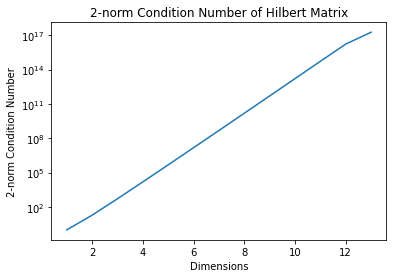

In [137]:
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt

def condition_number_analysis():
    n_max = 13

    N = np.arange(1,n_max+1, dtype=np.int16)
    K = np.zeros(n_max)
             
    for n in N:
        H = scipy.linalg.hilbert(n)
        H_inv =  np.linalg.inv(H)
        K[n-1] = np.linalg.norm(H,2)*np.linalg.norm(H_inv,2)
    
    plt.xlabel("Dimensions")
    plt.ylabel("2-norm Condition Number")
    plt.yscale("log")
    plt.title("2-norm Condition Number of Hilbert Matrix")
    plt.plot(N,K)

condition_number_analysis()

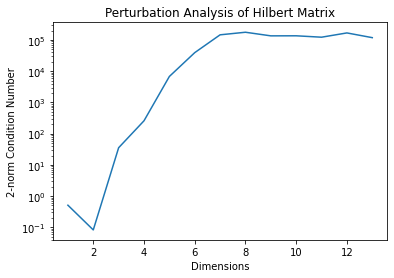

In [149]:


def foo(x, H, b, dx, dH, db):
    x_norm = np.linalg.norm(x,2)
    H_norm = np.linalg.norm(H,2)
    b_norm = np.linalg.norm(b,2)
    dx_norm = np.linalg.norm(dx,2)
    dH_norm = np.linalg.norm(dH,2)
    db_norm = np.linalg.norm(db,2)
    return (dx_norm/x_norm)/(dH_norm/H_norm + db_norm/b_norm)
                             

def perturbation_analysis():
    n_max = 13
    c = 0.00001
    N = np.arange(1,n_max+1, dtype=np.int16)
    
    A = np.zeros(n_max)
    for n in N:
        b = np.ones(n) 
        H = scipy.linalg.hilbert(n)
        x = np.linalg.solve(H, b )
  
        db = np.random.uniform(-0,c, b.shape)
        dH = np.random.uniform(0, 1/(2*H.shape[0] + 1)*c, H.shape)
        dx = x - np.linalg.solve(H+ dH, b + db)
        
        A[n-1] = foo(x, H, b, dx, dH, db)
    
    plt.plot( N, A)
    plt.xlabel("Dimensions")
    plt.ylabel("2-norm Condition Number")
    plt.yscale("log")
    plt.title("Perturbation Analysis of Hilbert Matrix")
    plt.show()

perturbation_analysis()